# THE SPARKS FOUNDATION 
## GRADUATE ROTATIONAL INTERNSHIP PROGRAM
## DATA SCIENCE AND BUSINESS ANALYTICS

### Task1 : Prediction using Supervised Machine Learning
### Author: Abdullah Ficici 

**Business context.** You are the (intern) data scientist at the The Sparks Foundation. Students' study hours and percentage scores have been collected.

**Problem statement.** Predict the percentage of a student based on the no. of study hours using Linear Regression.<br>  <i>"What will be the predicted score if a student studies for 9.25 hrs/day?"</i>

**Analytical context.** The data to be processed has been provided by the company, which includes student study hours and percentage scores. Using your data analysis skills, predict the percentage of an student based on the no. of study hours. This is a simple linear regression task as it involves just 2 variables.

### Importing the packages for data analysis

We will use four main packages: ```pandas```,``` numpy```, ```matplotlib``` and ``` seaborn```, and the `sklearn` library. From ``sklearn`` we will import the ``linear_model`` package. 

In [1]:
import pandas as pd
import numpy as np  
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

### Read the Data
We are going to read the a .csv file from a given url. The following attributes are avaliable in the data.
1. **Hours:** Numbers of study hours per day.
2. **Scores:** The scores percentages of the students. 

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

Data imported successfully


### Explore the Data

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.shape

(25, 2)

In [6]:
print(f'There are {df.shape[0]} records, each containing {df.shape[1]} column values: {df.columns[0]} and {df.columns[1]}.')

There are 25 records, each containing 2 column values: Hours and Scores.


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


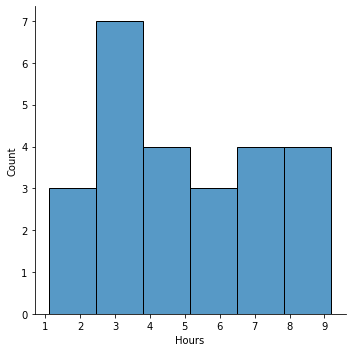

In [8]:
sns.displot(df.Hours)
plt.show()

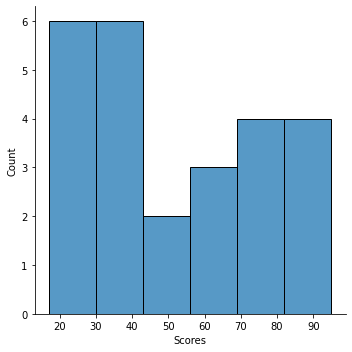

In [9]:
sns.displot(df.Scores)
plt.show()

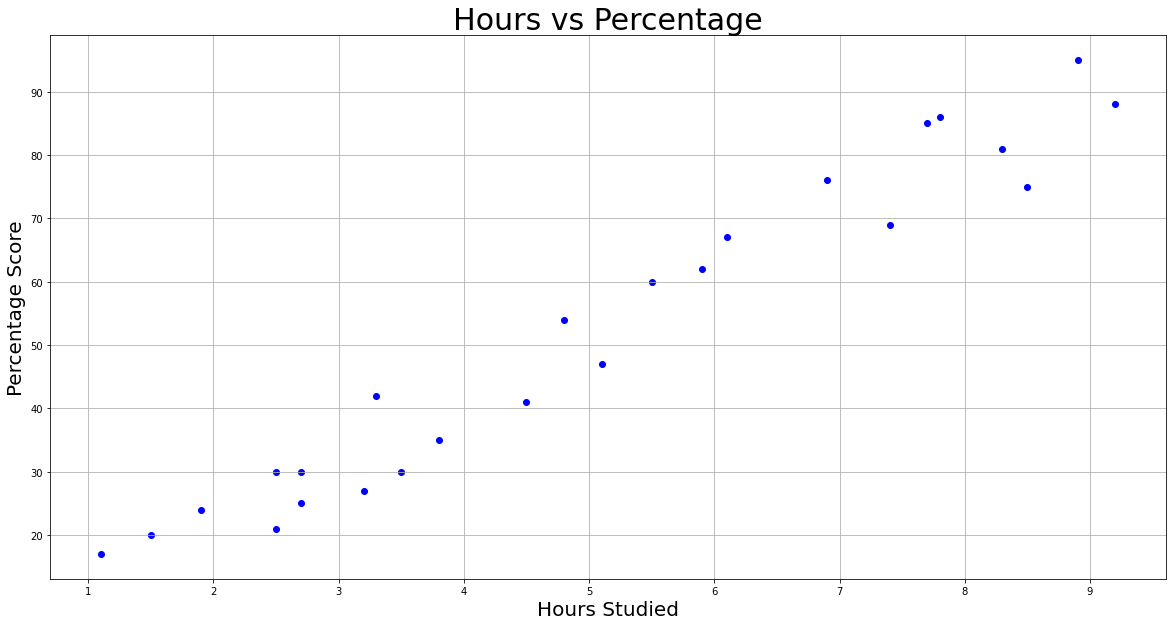

In [10]:
plt.figure(figsize=(20,10))
plt.title('Hours vs Percentage', fontsize = 30)
plt.xlabel('Hours Studied', fontsize = 20)
plt.ylabel('Percentage Score', fontsize = 20)
plt.grid()
plt.scatter(df.Hours, df.Scores, color = 'blue')
plt.show()

- There is a **strong positive correlation** between the number of hours studied and the percentage of score.

### Correlation

In [11]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Splitting the Data

In [12]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [13]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [16]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [17]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [18]:
Y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [19]:
Y_test

array([20, 27, 69, 30, 62])

In [20]:
# Create linear regression object
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### What will be predicted score if a student studies for 9.25 hrs/ day? 

In [21]:
y_mx_b = pd.DataFrame({"The Predicted Score:": reg.predict([[9.25]]),
'Coefficent:': reg.coef_,
'Intercept:': reg.intercept_}).T.rename(columns={0: "Numbers"})
y_mx_b

,Numbers
The Predicted Score:,93.691732
Coefficent:,9.910656
Intercept:,2.018160


In [22]:
print("The Predicted Score:", reg.predict([[9.25]]))

The Predicted Score: [93.69173249]


In [23]:
print('Coefficent:', reg.coef_)

Coefficent: [9.91065648]


In [24]:
print('Intercept:', reg.intercept_)

Intercept: 2.018160041434662


### Visualization of the Model

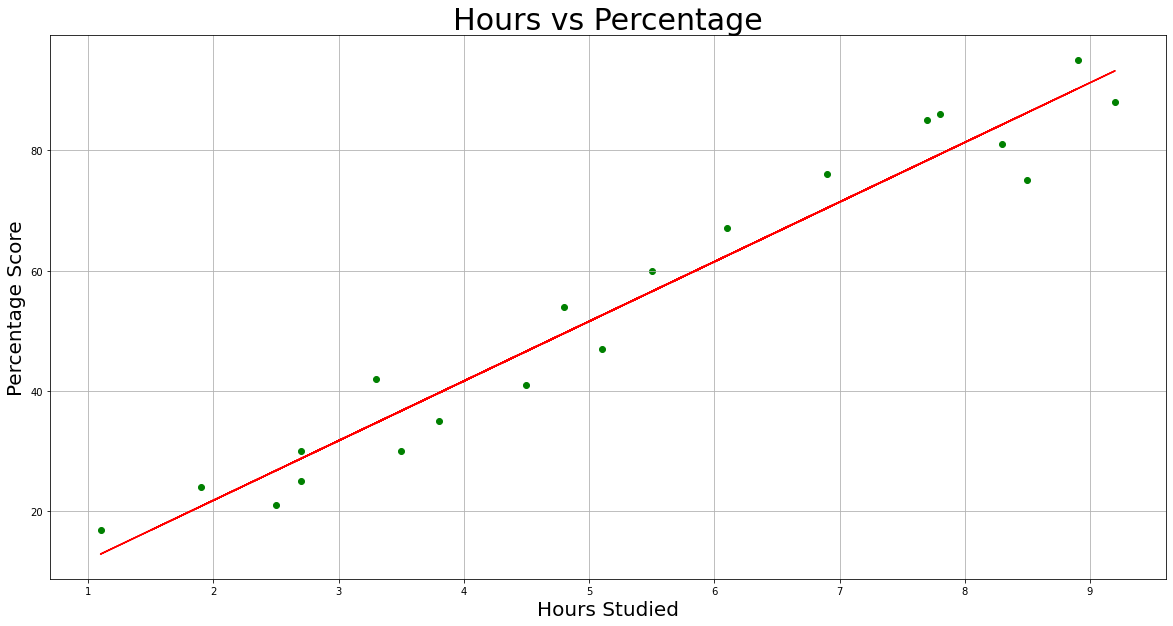

In [25]:
line = reg.coef_ * X + reg.intercept_
plt.figure(figsize=(20,10))
plt.scatter(X_train, Y_train, color = 'green')
plt.plot(X, line, color = 'red')
plt.title('Hours vs Percentage', fontsize = 30)
plt.xlabel('Hours Studied', fontsize = 20)
plt.ylabel('Percentage Score', fontsize = 20)
plt.grid()
plt.show()

#### y = m * X + b (m is coefficient and b is intercept)

In [26]:
print('Y = m * X + b (m is coefficient and b is intercept)')
print(f'Y = {reg.coef_} * 9.25 + {reg.intercept_}')
print("If a student studies for 9.25 hrs/day, the Predicted Score will be:", reg.coef_ * 9.25 + reg.intercept_)

Y = m * X + b (m is coefficient and b is intercept)
Y = [9.91065648] * 9.25 + 2.018160041434662
If a student studies for 9.25 hrs/day, the Predicted Score will be: [93.69173249]


In [27]:
Y_pred=reg.predict(X_test)

In [28]:
real_pre_df=pd.DataFrame({'Target':Y_test,'Predicted':Y_pred})
real_pre_df

,Target,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Model Evaluation

In [29]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [30]:
print("Mean Absolute Error:",metrics.mean_absolute_error(Y_test,Y_pred))

Mean Absolute Error: 4.183859899002982


In [31]:
print('R2 score:',r2_score(Y_test,Y_pred))

R2 score: 0.9454906892105354


This is the $R^2$ of this model, so this model explains more than 95% of the variance, which is pretty good!

In [32]:
real_pre_df=pd.DataFrame({'Target':Y_test,'Predicted':Y_pred})
real_pre_df
real_pre_df

,Target,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033
